# Problem Statement

    Perform Hierarchical Clustering from scratch and also using sklearn to perform wholesale
customer segmentation based on their annual spending on products. You can use this dataset.
Use the threshold to

1. Divide the dataset into two clusters.

2. To divide the dataset into k clusters, such that the distance between the two clusters is greater
   than a given threshold (this threshold can be anything passed to the function).

Hierarchical K-Means: Construction of Hashing Tree
Hierarchical clustering is the hierarchical decomposition of the data based on group
similarities. It allows us to build tree structures from data similarities and see how different subclusters relate to each other, and how far apart data points are. It gives us a tree-type structure
based on the hierarchical series of nested clusters. A diagram called Dendrogram graphically
represents this hierarchy and is an inverted tree that describes the order in which factors are
merged, or clusters are broken apart.


# Importing necessary Libarary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
# Reading the libary
X = pd.read_csv('Wholesale customers data.csv')
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Model building

In [17]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

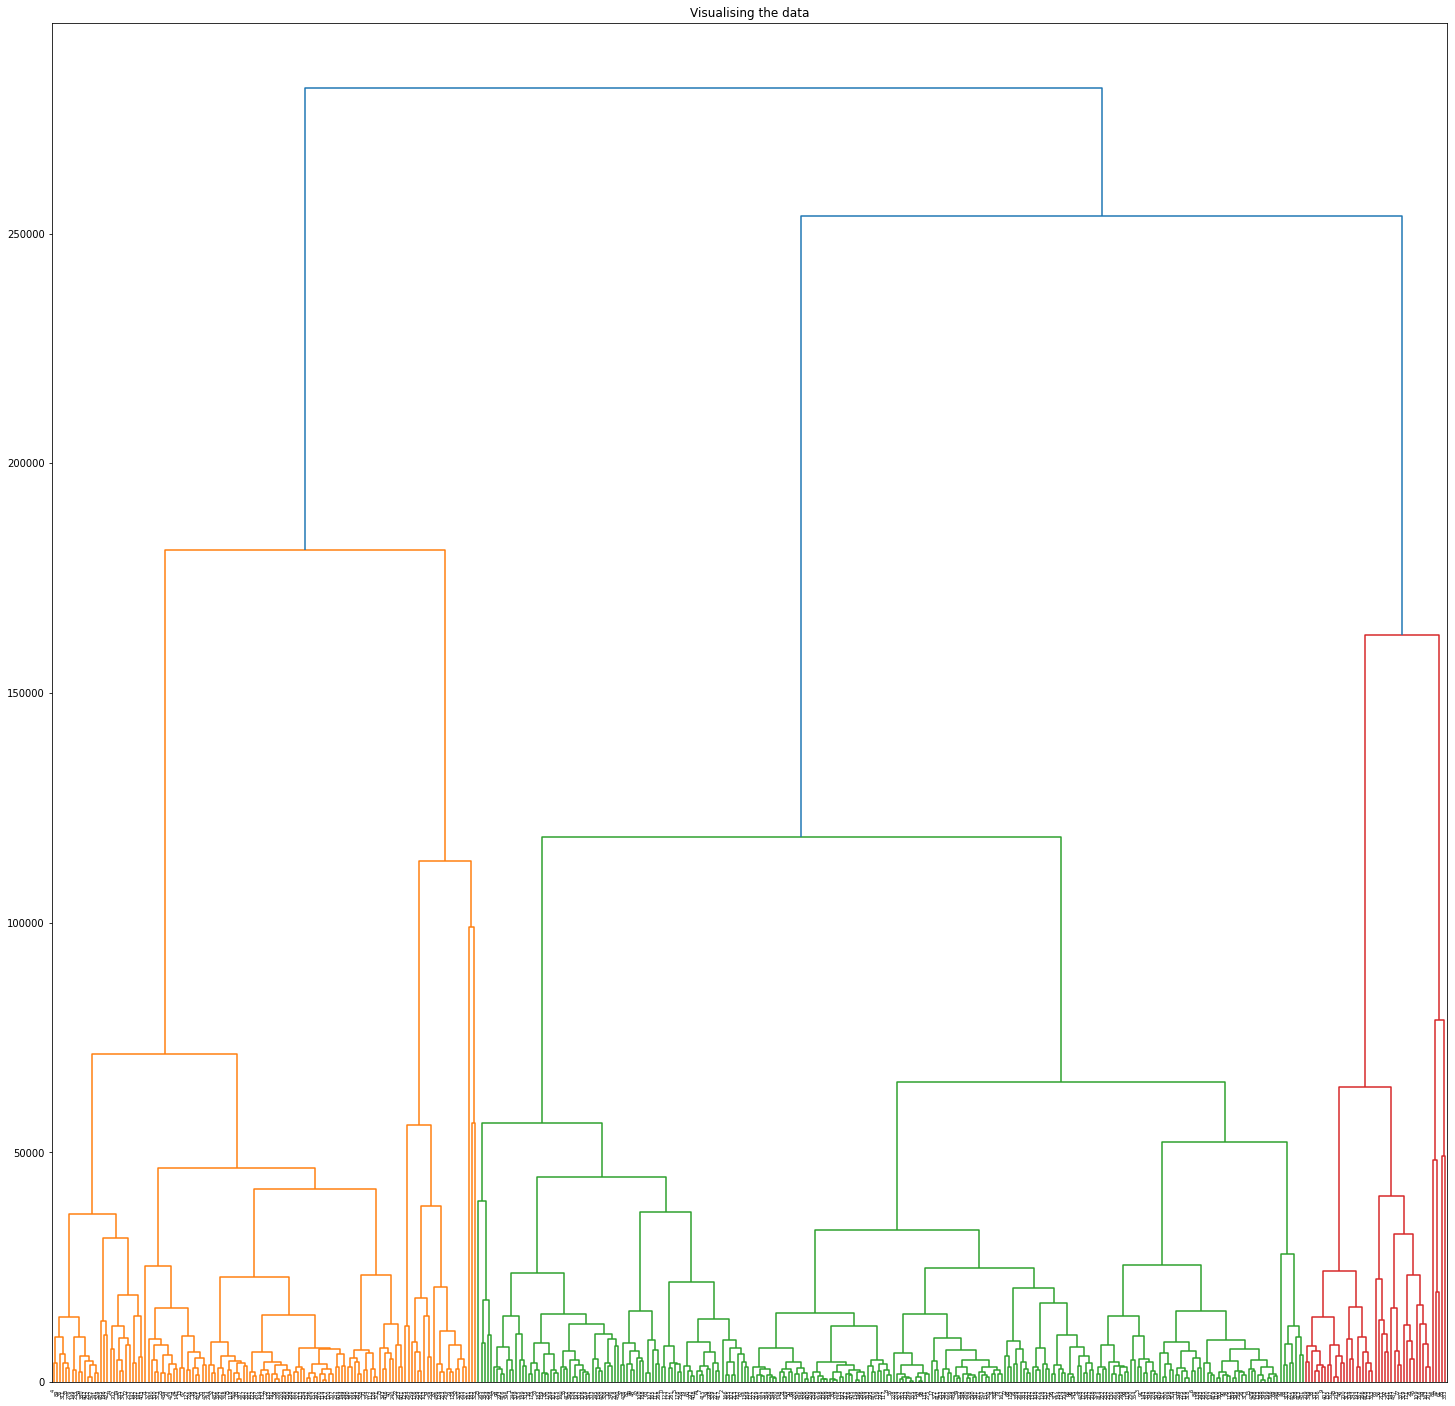

In [18]:
plt.figure(figsize =(25, 25))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data, method ='ward')))

In [19]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [20]:

# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [21]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

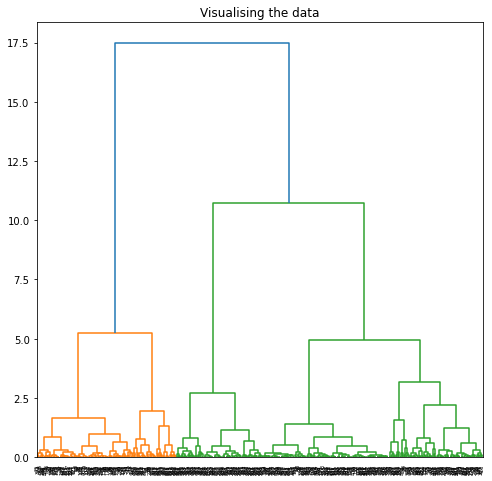

In [22]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

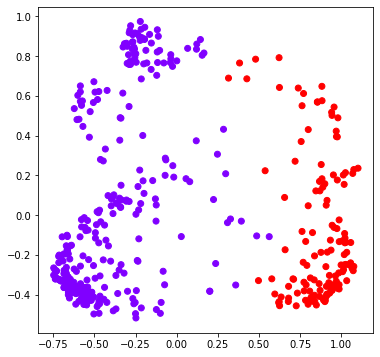

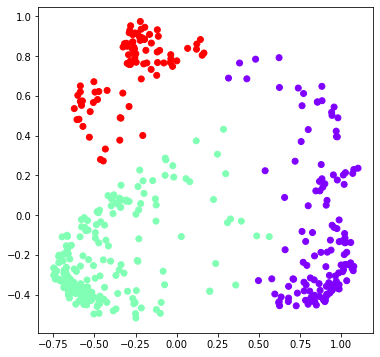

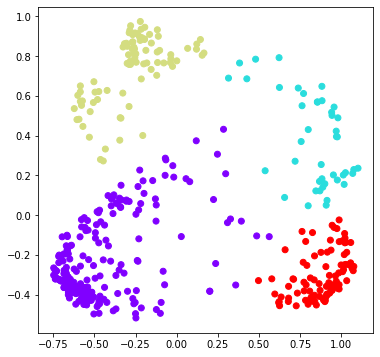

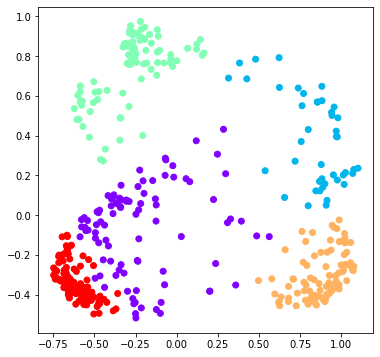

In [23]:
for i in range(2,6):
    ac2 = AgglomerativeClustering(n_clusters = i)
  
    # Visualizing the clustering
    plt.figure(figsize =(6, 6))
    plt.scatter(X_principal['P1'], X_principal['P2'], c = ac2.fit_predict(X_principal), cmap ='rainbow')
    plt.show()

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) 

# Single-Link Hierarchical
Single-Link: measures the shortest link

d(S1,S2)=min(s1,s2)∈S1×S2∥s1−s2∥2

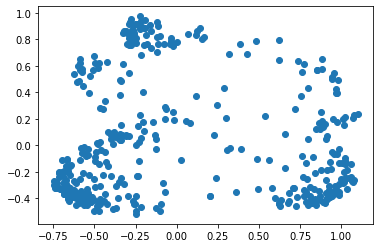

In [25]:
plt.scatter(X_principal['P1'],X_principal['P2'])

In [26]:
def single_distance(clusters ,cluster_num):
    print('first cluster | ','second cluster | ', 'distance')
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf
        # for every cluster (until second last element)
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            # for each point in each cluster
            for point_id,point in enumerate(cluster): 
                # we only need to compare with clusters after the current one
                for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]): 
                    # go through every point in this prospective cluster as well
                    for point2_id, point2 in enumerate(cluster2):
# if this distance is better than our previous best distance then we are going to overwrite it
                        if distance.euclidean(point,point2) < closest_distance: 
                            # Only used for comparing 
                            closest_distance = distance.euclidean(point,point2)
                # this will be used at the end to figure out which cluster to merge with which
                            clust_1 = cluster_id
                # this cluster will be destroyed by the end
                            clust_2 = cluster2_id+cluster_id+1
               # extend just appends the contents to the list without flattening it out
        print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2]) 
        # don't need this index anymore, and we have just clustered once more
        clusters.pop(clust_2) 
    return(clusters)

In [29]:
### Hierarchical clustering
def hierarchical(data, cluster_num, metric = 'single'):
    # initialization of clusters at first (every point is a cluster)
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['P1'], row['P2']]])
    if metric is 'single':
        return single_distance(init_clusters, cluster_num)

first cluster |  second cluster |  distance
34  |  274  |  0.0009126254659810702
182  |  419  |  0.0010025454931451058
245  |  264  |  0.0015541577927375872
26  |  387  |  0.0019544082227520108
283  |  375  |  0.001961214648021114
225  |  248  |  0.0023002226060336896
122  |  162  |  0.002348606664032266
82  |  169  |  0.0025645747867994347
357  |  384  |  0.0025668217435550673
116  |  361  |  0.0026402960531594567
133  |  167  |  0.002776399787863634
135  |  280  |  0.0033489951747201607
251  |  258  |  0.0035618719099010676
78  |  383  |  0.0035696569885651824
185  |  405  |  0.0036561995501143622
26  |  115  |  0.003677132353983687
83  |  376  |  0.0037104318383259253
170  |  346  |  0.003986112804617284
130  |  411  |  0.004167557241875976
80  |  188  |  0.004315199566219481
361  |  405  |  0.004328401881871991
1  |  53  |  0.004617441200041524
165  |  387  |  0.0046378105635259854
63  |  349  |  0.004842228326866847
119  |  339  |  0.004964040297010836
96  |  97  |  0.005041518141

189  |  194  |  0.02603111135884098
105  |  133  |  0.02605388432009837
14  |  95  |  0.026170944914761615
6  |  62  |  0.02621388713177411
14  |  26  |  0.026376752421074564
14  |  57  |  0.026553635672835717
152  |  155  |  0.02660022630481823
68  |  142  |  0.026951490527414513
16  |  70  |  0.027201914393115704
54  |  203  |  0.02724412138808012
29  |  200  |  0.02730435289155029
60  |  66  |  0.02733940798752742
1  |  9  |  0.027342353043207424
105  |  125  |  0.027357006038004103
54  |  192  |  0.027369225708297706
95  |  125  |  0.02739636425287413
3  |  69  |  0.027546343692546767
7  |  27  |  0.028064969434830257
3  |  58  |  0.02827556452340035
49  |  57  |  0.02835350070168241
54  |  73  |  0.028679993205677212
22  |  74  |  0.028822906513094194
118  |  124  |  0.02899205041815829
148  |  162  |  0.02934597347104972
23  |  65  |  0.029364342699529613
42  |  169  |  0.02945916465061662
1  |  31  |  0.0297113649636683
53  |  83  |  0.029924340010952295
131  |  150  |  0.030223

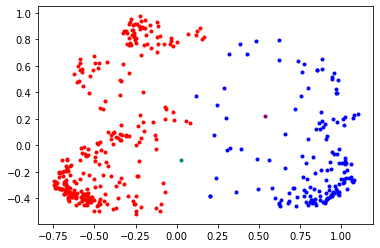

In [30]:
clusters = hierarchical(X_principal,4)
colors = ['blue', 'red', 'purple', 'teal']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])